In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
ir = pd.read_csv("iris.csv")

In [14]:
ir.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


<AxesSubplot:xlabel='sepal.length', ylabel='sepal.width'>

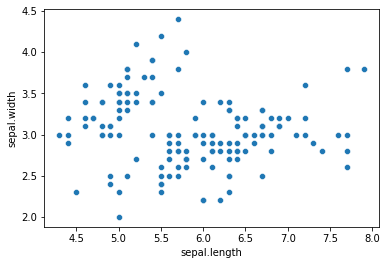

In [39]:
sns.scatterplot(data=ir,x='sepal.length',y='sepal.width')

<AxesSubplot:xlabel='variety', ylabel='count'>

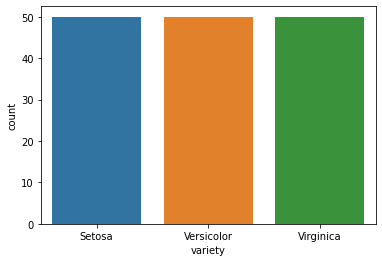

In [18]:
sns.countplot(data=ir,x='variety')

<AxesSubplot:xlabel='variety', ylabel='sepal.width'>

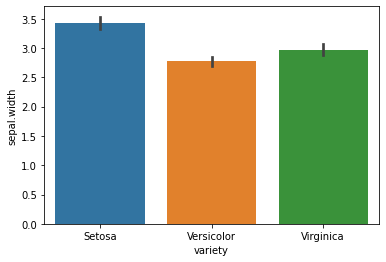

In [41]:
sns.barplot(data=ir,x='variety',y='sepal.width')

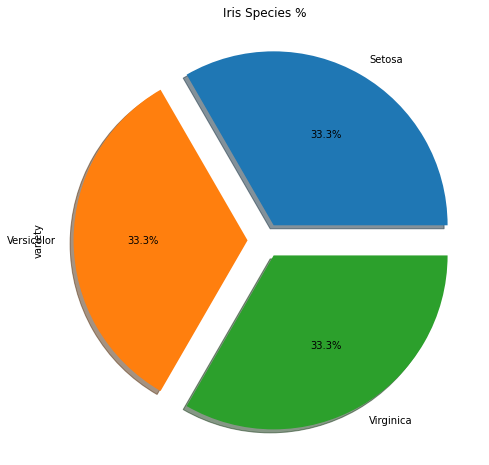

In [33]:
ax=plt.subplots(1,1,figsize=(10,8))
ir['variety'].value_counts().plot.pie(explode=[0.1,0.1,0.1],autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.title("Iris Species %")
plt.show()

<AxesSubplot:xlabel='variety', ylabel='sepal.width'>

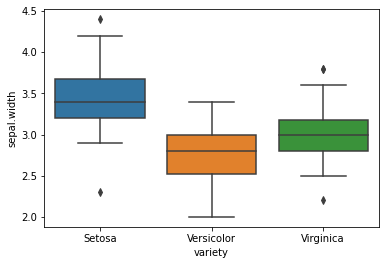

In [28]:
sns.boxplot(data=ir,x='variety',y='sepal.width')

<AxesSubplot:xlabel='variety', ylabel='sepal.width'>

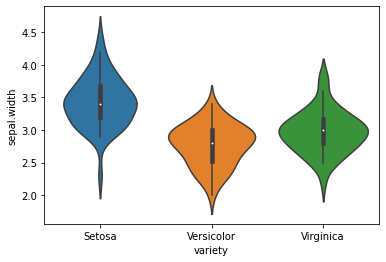

In [43]:
sns.violinplot(data=ir,x='variety',y='sepal.width')

<AxesSubplot:xlabel='sepal.length', ylabel='Count'>

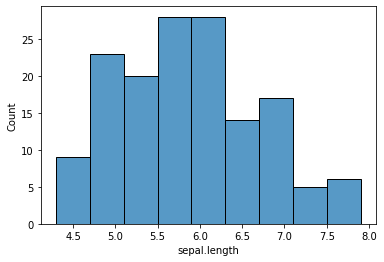

In [35]:
sns.histplot(data=ir,x='sepal.length')

<AxesSubplot:>

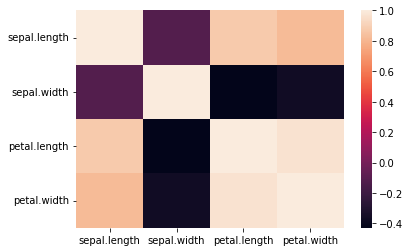

In [37]:
sns.heatmap(ir.drop('variety',axis=1).corr())

# chi-square

In [44]:
observed = list(map(int,input('Enter Observed Values :').split()))
expected = list(map(int,input('Enter Expected Values :').split()))
chi_square = 0
for o,e in zip(observed,expected):
    chi_square += (((o - e) ** 2) / e)
print(chi_square)

Enter Observed Values :1 2 3
Enter Expected Values :3 2 1
5.333333333333333


In [1]:
import pandas as pd
import numpy as np
from apyori import apriori

In [3]:
df = pd.read_csv('Groceries.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
trans = []
for i in range(7501):
    trans.append([df.values[i,j] for j in range(20) if df.values[i,j] is not np.nan])

In [5]:
rules = apriori(transactions=trans,min_support=0.0045,min_confidence=0.3,min_lift=3,max_length=2)
association_rule = list(rules)

In [6]:
for item in association_rule:
    items = [x for x in item[0]]
    print("Rule: " + items[0] + " -> " + items[1])
    print("Support: " + str(item[1]))
    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: escalope -> mushroom cream sauce
Support: 0.005732568990801226
Confidence: 0.3006993006993007
Lift: 3.790832696715049
Rule: escalope -> pasta
Support: 0.005865884548726837
Confidence: 0.3728813559322034
Lift: 4.700811850163794
Rule: herb & pepper -> ground beef
Support: 0.015997866951073192
Confidence: 0.3234501347708895
Lift: 3.2919938411349285
Rule: ground beef -> tomato sauce
Support: 0.005332622317024397
Confidence: 0.3773584905660377
Lift: 3.840659481324083
Rule: shrimp -> pasta
Support: 0.005065991201173177
Confidence: 0.3220338983050847
Lift: 4.506672147735896


In [7]:
import pandas as pd
import scipy.stats as stats

In [8]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size,price_per_person,Payer Name,CC Number,Payment ID
0,16.99,1.01,Female,No,Sun,Dinner,2,8.49,Christy Cunningham,3560325168603410,Sun2959
1,10.34,1.66,Male,No,Sun,Dinner,3,3.45,Douglas Tucker,4478071379779230,Sun4608
2,21.01,3.50,Male,No,Sun,Dinner,3,7.00,Travis Walters,6011812112971322,Sun4458
3,23.68,3.31,Male,No,Sun,Dinner,2,11.84,Nathaniel Harris,4676137647685994,Sun5260
4,24.59,3.61,Female,No,Sun,Dinner,4,6.15,Tonya Carter,4832732618637221,Sun2251


In [9]:
tab = pd.crosstab(df['sex'],df['time'])
print(tab)
chi2,p,dof,expected = stats.chi2_contingency(tab)
print('Chi-Square Value :',round(chi2,5))
print('P Value :',round(p,5))
print('Relation') if p <= 0.05 else print('No Relation')

time    Dinner  Lunch
sex                  
Female      52     35
Male       124     33
Chi-Square Value : 9.34381
P Value : 0.00224
Relation


In [10]:
from scipy.spatial import distance_matrix
import numpy as np
def GetMatrix(text, metric):
    rows = text.split('\n')
    rows = [row.strip() for row in rows if row.strip() != '']
    mat = [list(map(int, row.split(' '))) for row in rows]
    dist_mat = distance_matrix(mat, mat, p=metric)
    dist_mat = np.round(np.matrix(dist_mat), 2)
    return dist_mat

In [11]:
print('-------Metrics-------')
print('1. Manhattan Distance')
print('2. Euclidean Distance')
print('3. Mahalanobis Distance')
text = '''
 1 2 3
 4 5 6
 7 8 9
 1 4 5
 '''
metirc = int(input('Enter Metric : '))
print(GetMatrix(text, metirc))

-------Metrics-------
1. Manhattan Distance
2. Euclidean Distance
3. Mahalanobis Distance
Enter Metric : 2
[[ 0.    5.2  10.39  2.83]
 [ 5.2   0.    5.2   3.32]
 [10.39  5.2   0.    8.25]
 [ 2.83  3.32  8.25  0.  ]]
